In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from datetime import datetime
import json
import openweathermapy.core as ow 

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
data_file = "starter_code/data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
    
# Print the city count to confirm sufficient count
len(cities)

593

In [5]:
api_key = "c8e8d683c4df8f4befbddcc64f10d3c9"

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
units= "imperial"
query= f"{url}appid={api_keys}&units={units}&q="

print("------------ --------------------------------")
print("Data Processing Complete")
print("--------------------------------------------")

latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
dates = []

for x in range(len(cities)):
    response = requests.get(f"{query}{cities[x]},{cities[x].upper()}").json()
    
    try:
        temperature.append(response['main']['temp_max'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        dates.append(response['dt'])
    except KeyError:
        temperature.append(np.nan)
        latitude.append(np.nan)
        longitude.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        dates.append(np.nan)
    
    try:
        cloudiness.append(response['clouds']['all'])
        
        
    except KeyError:
        cloudiness.append(0)
        
        
    print(f"Processing record {x + 1} | {cities[x]}")
    print(f"{query}{cities[x]},{cities[x].upper()}")
    
    
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

weather_df = pd.DataFrame({"City": cities,
                           "Latitude": latitude,
                           "Longitude": longitude,
                           "Humidity": humidity,
                           "Max Temp": temperature,
                           "Cloudiness": cloudiness,
                           "Wind Speed": wind_speed,
                           "Date": dates,
                           "Country": cities
                          })

------------ --------------------------------
Data Processing Complete
--------------------------------------------
Processing record 1 | yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=yellowknife,YELLOWKNIFE
Processing record 2 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=bredasdorp,BREDASDORP
Processing record 3 | nizhneyansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL2018

Processing record 27 | tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=tuktoyaktuk,TUKTOYAKTUK
Processing record 28 | upernavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=upernavik,UPERNAVIK
Processing record 29 | kavieng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=kavieng,KAVIENG
Processing

Processing record 53 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=hithadhoo,HITHADHOO
Processing record 54 | mys shmidta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=mys shmidta,MYS SHMIDTA
Processing record 55 | saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=saldanha,SALDANHA
Process

Processing record 79 | okhotsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=okhotsk,OKHOTSK
Processing record 80 | apt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=apt,APT
Processing record 81 | sisimiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=sisimiut,SISIMIUT
Processing record 82 | champasak
http

Processing record 105 | manaus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=manaus,MANAUS
Processing record 106 | bandarbeyla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=bandarbeyla,BANDARBEYLA
Processing record 107 | oranjemund
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=oranjemund,ORANJEMUND
Process

Processing record 131 | altay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=altay,ALTAY
Processing record 132 | houma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=houma,HOUMA
Processing record 133 | xuddur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=xuddur,XUDDUR
Processing record 134 | planeta rica
htt

Processing record 158 | naze
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=naze,NAZE
Processing record 159 | neuquen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=neuquen,NEUQUEN
Processing record 160 | puerto quijarro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=puerto quijarro,PUERTO QUIJARRO
Processing

Processing record 184 | lagos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=lagos,LAGOS
Processing record 185 | tezu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=tezu,TEZU
Processing record 186 | stratonion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=stratonion,STRATONION
Processing record 187 | ossora


Processing record 209 | laguna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=laguna,LAGUNA
Processing record 210 | saint-joseph
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=saint-joseph,SAINT-JOSEPH
Processing record 211 | omsukchan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=omsukchan,OMSUKCHAN
Process

Processing record 234 | romulus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=romulus,ROMULUS
Processing record 235 | traralgon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=traralgon,TRARALGON
Processing record 236 | sulingen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=sulingen,SULINGEN
Processing recor

Processing record 259 | baringo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=baringo,BARINGO
Processing record 260 | honningsvag
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=honningsvag,HONNINGSVAG
Processing record 261 | bairiki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=bairiki,BAIRIKI
Processing re

Processing record 284 | cayenne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=cayenne,CAYENNE
Processing record 285 | atar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=atar,ATAR
Processing record 286 | gibara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=gibara,GIBARA
Processing record 287 | lebu
http://a

Processing record 309 | salisbury
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=salisbury,SALISBURY
Processing record 310 | lorengau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=lorengau,LORENGAU
Processing record 311 | maniitsoq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=maniitsoq,MANIITSOQ
Processing

Processing record 337 | sukhumi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=sukhumi,SUKHUMI
Processing record 338 | tessalit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=tessalit,TESSALIT
Processing record 339 | sakaraha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=sakaraha,SAKARAHA
Processing record 3

Processing record 362 | richards bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=richards bay,RICHARDS BAY
Processing record 363 | berdigestyakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=berdigestyakh,BERDIGESTYAKH
Processing record 364 | linhares
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=linhare

Processing record 388 | do gonbadan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=do gonbadan,DO GONBADAN
Processing record 389 | jacareacanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=jacareacanga,JACAREACANGA
Processing record 390 | vaitupu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=vaitupu,VAITUP

Processing record 414 | dalby
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=dalby,DALBY
Processing record 415 | amahai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=amahai,AMAHAI
Processing record 416 | novoderevyankovskaya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=novoderevyankovskaya,NOVODEREVYANKOVS

Processing record 440 | umea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=umea,UMEA
Processing record 441 | umm durman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=umm durman,UMM DURMAN
Processing record 442 | tuatapere
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=tuatapere,TUATAPERE
Processing record 4

Processing record 466 | pandan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=pandan,PANDAN
Processing record 467 | hirara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=hirara,HIRARA
Processing record 468 | anadyr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=anadyr,ANADYR
Processing record 469 | bowen
http

Processing record 492 | los llanos de aridane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=los llanos de aridane,LOS LLANOS DE ARIDANE
Processing record 493 | mogadouro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=mogadouro,MOGADOURO
Processing record 494 | kilindoni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=im

Processing record 517 | gat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=gat,GAT
Processing record 518 | margate
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=margate,MARGATE
Processing record 519 | zhaotong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=zhaotong,ZHAOTONG
Processing record 520 | geresk
htt

Processing record 542 | tambo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=tambo,TAMBO
Processing record 543 | sao gabriel da cachoeira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=sao gabriel da cachoeira,SAO GABRIEL DA CACHOEIRA
Processing record 544 | atikokan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperi

Processing record 568 | sao geraldo do araguaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=sao geraldo do araguaia,SAO GERALDO DO ARAGUAIA
Processing record 569 | slave lake
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=slave lake,SLAVE LAKE
Processing record 570 | kharitonovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py

Processing record 593 | cervo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=cervo,CERVO
Processing record 594 | port-cartier
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=port-cartier,PORT-CARTIER
Processing record 595 | dong hoi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=dong hoi,DONG HOI
Processing re

Processing record 619 | puerto del rosario
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=puerto del rosario,PUERTO DEL ROSARIO
Processing record 620 | huarmey
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=huarmey,HUARMEY
Processing record 621 | benghazi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c8e8d683c4df8f4befbddcc64f10d3c9appid=<module 'api_keys' from 'C:\\Users\\tiffa\\Desktop\\Data Analytics\\GTATL201808DATA3\\Homework\\06-Python-APIs\\Instructions\\starter_code\\api_keys.py'>&units=imperial&q=benghaz

In [12]:
weather_df = weather_df.dropna(how='any')

print(f"The data frame contains {len(weather_df['City'])} unique cities.")

The data frame contains 0 unique cities.


In [13]:
weather_df.head()

,City,Latitude,Longitude,Humidity,Max Temp,Cloudiness,Wind Speed,Date,Country


KeyError: 'the label [0] is not in the [index]'

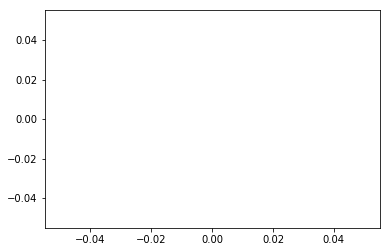

In [9]:

plt.scatter(x = weather_df['Latitude'], y = weather_df['Humidity'],
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

weather_dt = datetime.fromtimestamp(weather_df.loc[0,"Date"]).strftime('%Y-%m-%d')
plt.title(f"Latitude vs. Humidity ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


plt.xlim(-80,100)
plt.ylim(-10, 110)


plt.show()

In [ ]:
plt.scatter(weather_df["Latitude"], weather_df["Max Temp"], marker="o")

plt.title("City Latitude vs Max Temperature")
plt.ylabel("Temperature (F) ")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)


plt.savefig("Lat_vs_MaxTemp.png")

plt.show()

KeyError: 'the label [0] is not in the [index]'

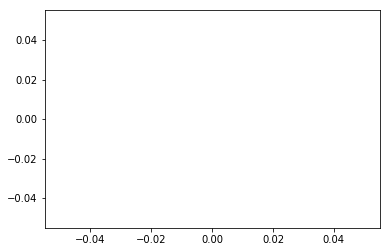

In [10]:

plt.scatter(x = weather_df['Latitude'], y = weather_df['Cloudiness'],
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

weather_dt = datetime.fromtimestamp(weather_df.loc[0,"Date"]).strftime('%Y-%m-%d')
plt.title(f"Latitude vs. Cloudiness ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Modify ticks
plt.xlim(-80,100)
plt.ylim(-10, 110)


plt.show()

In [ ]:

plt.scatter(x = weather_df['Latitude'], y = weather_df['Wind Speed'],
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

weather_dt = datetime.fromtimestamp(weather_df.loc[0,"Date"]).strftime('%Y-%m-%d')
plt.title(f"Latitude vs. Wind Speed ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")


plt.xlim(-80,100)
plt.ylim(-5, max(weather_df['Wind Speed'])+5)


plt.show()
